# Hotel Reservations EDA & Prediction

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Let us look at the data visually, and also predict if a guest will cancel a booking.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
sns.set_theme(style='whitegrid',palette='mako' )

In [2]:
df = pd.read_csv('../Hotel Reservations/Hotel Reservations.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
df['room_type_reserved'] = df['room_type_reserved'].str.replace('Room_Type', '')

In [7]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Exploratory Data Analysis

## Univariate Analysis

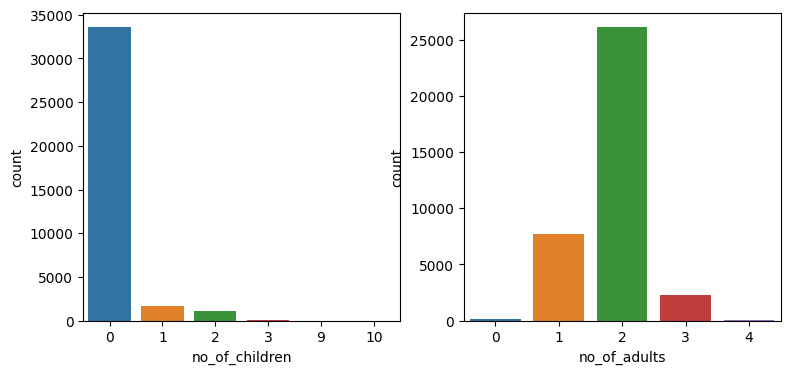

In [15]:
fig, ax = plt.subplots(1,2, figsize=(9,4))

sns.countplot(data=df,x='no_of_children' , ax=ax[0])
sns.countplot(data=df, x='no_of_adults', ax=ax[1]);

We can see above, the average number of adults is 2 per booking. Most of these do not have children, with the mean of 0.1. 

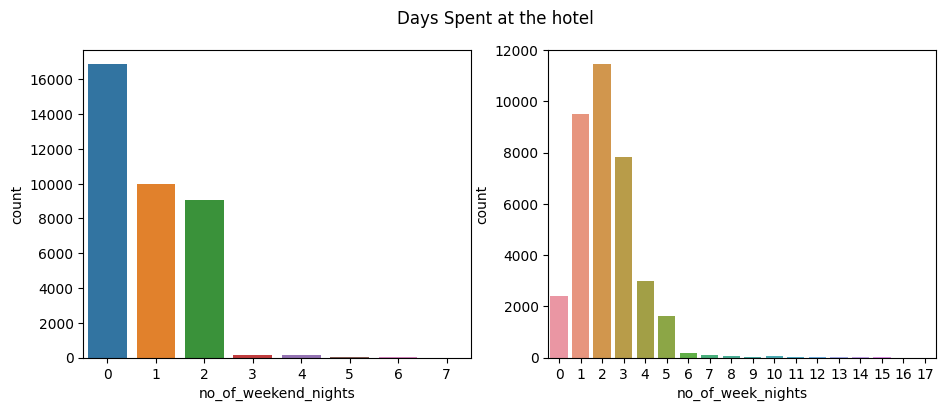

In [28]:
fig, ax = plt.subplots(1,2, figsize=(11,4))
fig.suptitle('Days Spent at the hotel')
sns.countplot(data=df,x='no_of_weekend_nights' , ax=ax[0]);
sns.countplot(data=df, x='no_of_week_nights', ax=ax[1]);

On average people don't stay over on weekends. On weekdays the average is 2 nights.

In [19]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


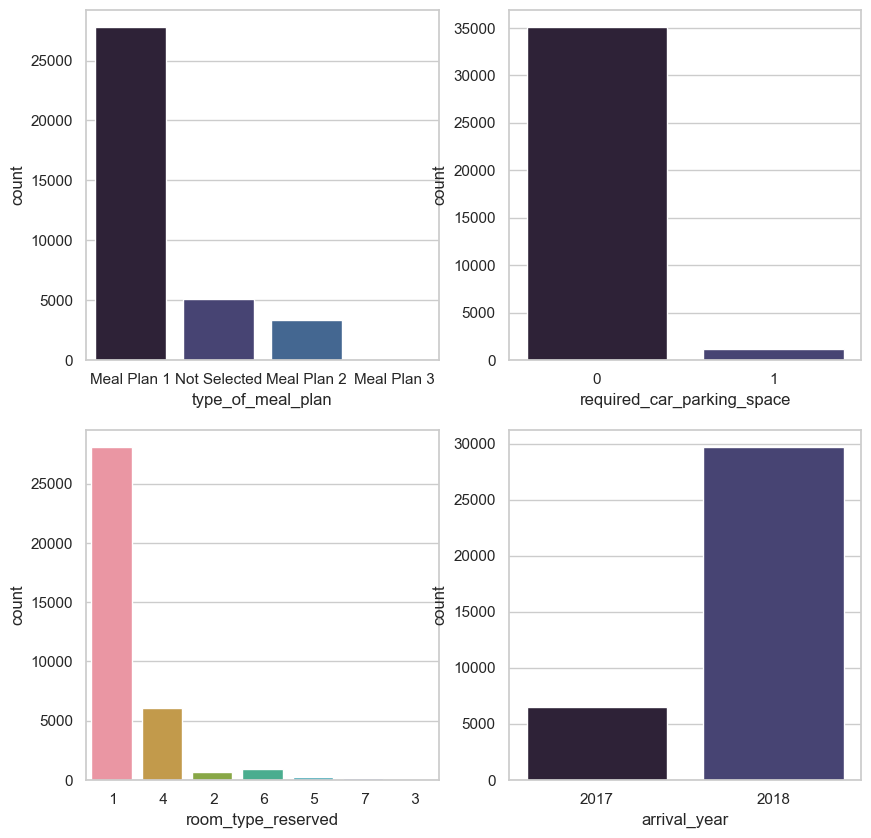

In [38]:
fig, axs =  plt.subplots(2,2, figsize=(10,10))
sns.countplot(data=df,x='type_of_meal_plan' , ax=axs[0][0]);
sns.countplot(data=df, x='required_car_parking_space', ax=axs[0][1]);
sns.countplot(data=df,x='room_type_reserved' , ax=axs[1][0]);
sns.countplot(data=df, x='arrival_year', ax=axs[1][1]);

In [39]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

<AxesSubplot:xlabel='no_of_previous_bookings_not_canceled', ylabel='count'>

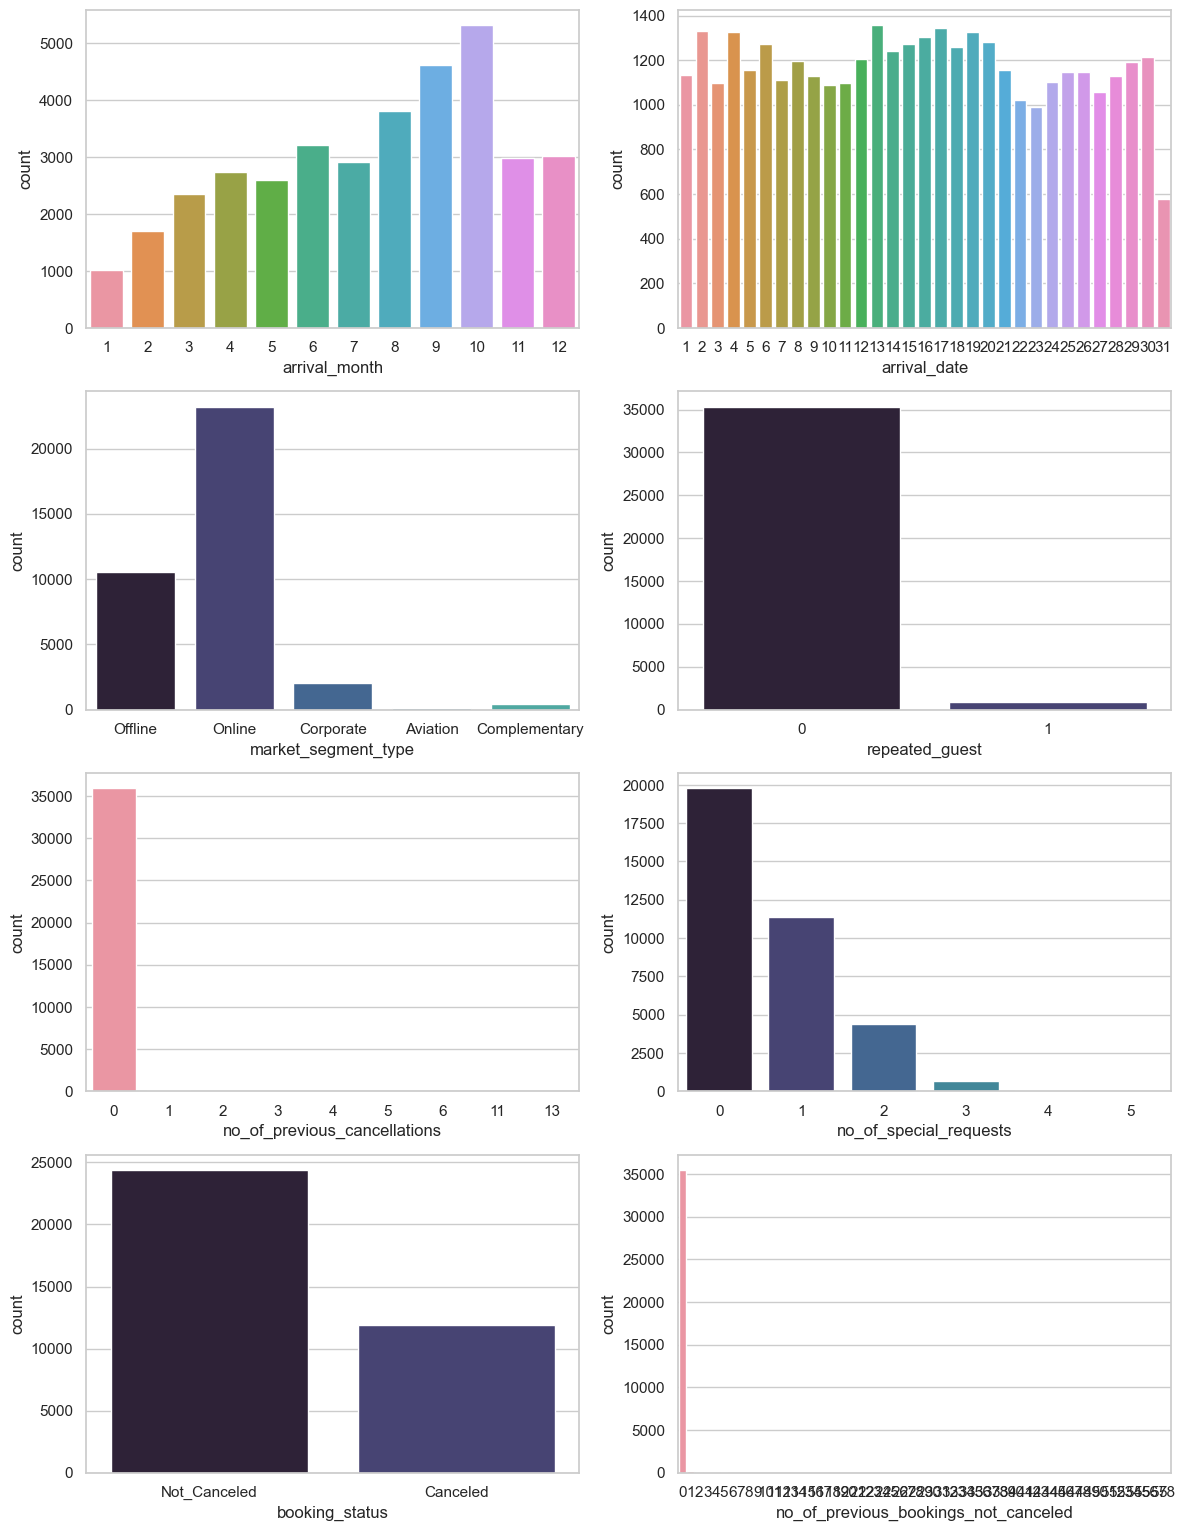

In [55]:
fig, axs =  plt.subplots(4,2, figsize=(14,19))

sns.countplot(data=df,x='arrival_month' , ax=axs[0][0]);
sns.countplot(data=df, x='arrival_date', ax=axs[0][1]);

sns.countplot(data=df,x='market_segment_type' , ax=axs[1][0]);
sns.countplot(data=df, x='repeated_guest', ax=axs[1][1]);

sns.countplot(data=df, x='no_of_previous_cancellations', ax=axs[2][0]);
sns.countplot(data=df, x='no_of_special_requests', ax=axs[2][1]);

sns.countplot(data=df, x='booking_status', ax=axs[3][0]);
sns.countplot(data=df, x='no_of_previous_bookings_not_canceled', ax=axs[3][1])

<AxesSubplot:xlabel='avg_price_per_room', ylabel='Count'>

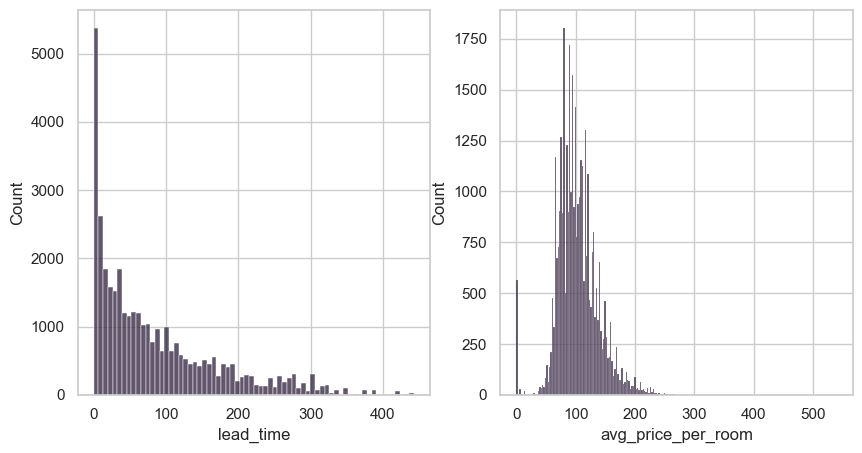

In [56]:
fig, ax =  plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=df, x='lead_time',ax=ax[0])
sns.histplot(data=df , x='avg_price_per_room', ax=ax[1])


## Bivariate Analysis

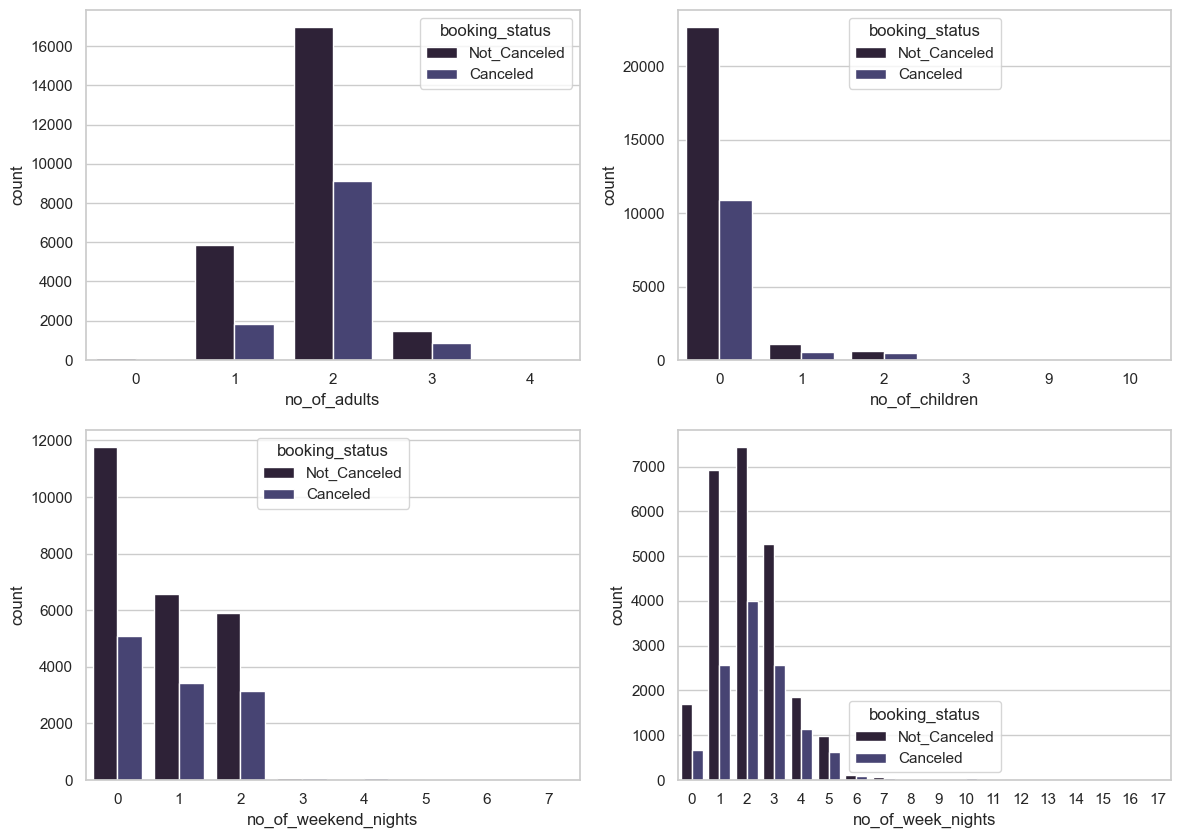

In [59]:
fig, ax = plt.subplots(2,2, figsize=(14,10))

sns.countplot(data=df, x='no_of_children', hue='booking_status', ax=ax[0][1]);
sns.countplot(data=df, x='no_of_adults', hue='booking_status', ax=ax[0][0]);

sns.countplot(data=df,x='no_of_weekend_nights',  hue='booking_status' , ax=ax[1][0]);
sns.countplot(data=df, x='no_of_week_nights',  hue='booking_status', ax=ax[1][1]);

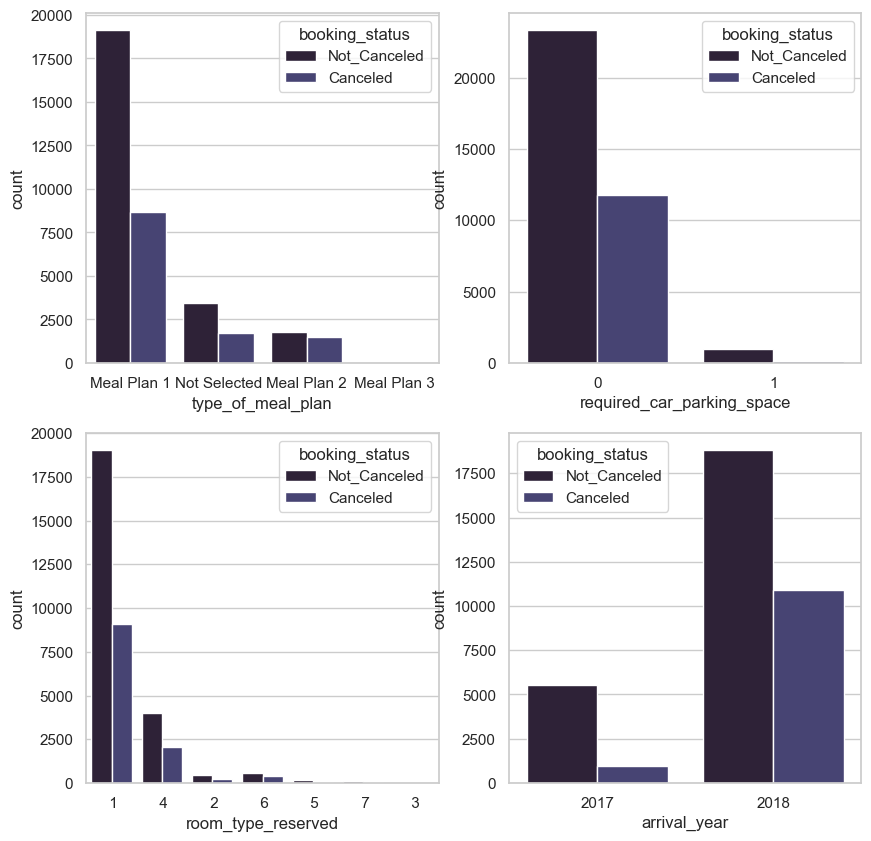

In [60]:
fig, axs =  plt.subplots(2,2, figsize=(10,10))
sns.countplot(data=df,x='type_of_meal_plan' , ax=axs[0][0], hue='booking_status');
sns.countplot(data=df, x='required_car_parking_space', ax=axs[0][1], hue='booking_status');
sns.countplot(data=df,x='room_type_reserved' , ax=axs[1][0], hue='booking_status');
sns.countplot(data=df, x='arrival_year', ax=axs[1][1], hue='booking_status');

<AxesSubplot:xlabel='no_of_previous_bookings_not_canceled', ylabel='count'>

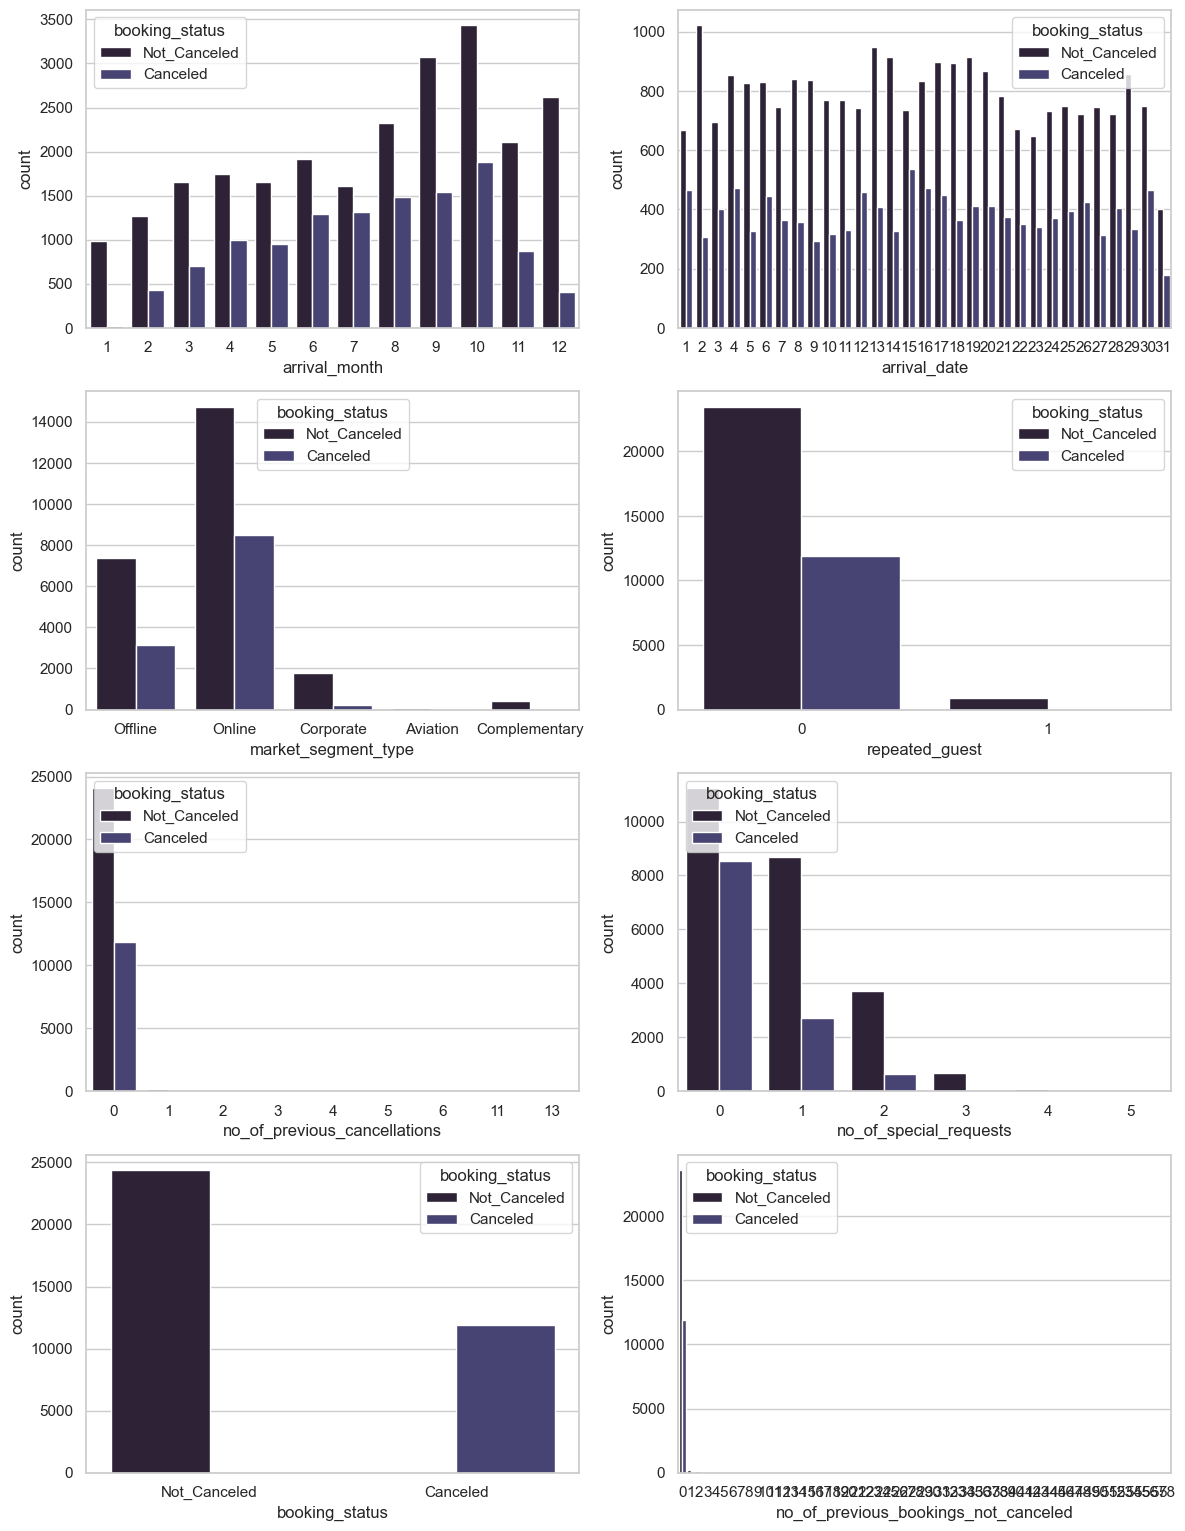

In [61]:
fig, axs =  plt.subplots(4,2, figsize=(14,19))

sns.countplot(data=df,x='arrival_month' , ax=axs[0][0], hue='booking_status');
sns.countplot(data=df, x='arrival_date', ax=axs[0][1], hue='booking_status');

sns.countplot(data=df,x='market_segment_type' , ax=axs[1][0], hue='booking_status');
sns.countplot(data=df, x='repeated_guest', ax=axs[1][1], hue='booking_status');

sns.countplot(data=df, x='no_of_previous_cancellations', ax=axs[2][0], hue='booking_status');
sns.countplot(data=df, x='no_of_special_requests', ax=axs[2][1], hue='booking_status');

sns.countplot(data=df, x='booking_status', ax=axs[3][0], hue='booking_status');
sns.countplot(data=df, x='no_of_previous_bookings_not_canceled', ax=axs[3][1], hue='booking_status')

<AxesSubplot:xlabel='avg_price_per_room', ylabel='Density'>

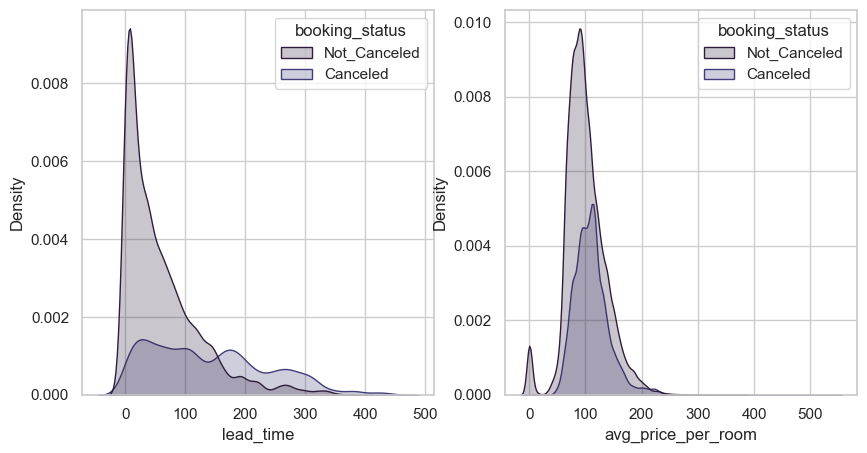

In [66]:
fig, ax =  plt.subplots(1,2, figsize=(10,5))
sns.kdeplot(data=df, x='lead_time',ax=ax[0], hue='booking_status' , shade=True);
sns.kdeplot(data=df , x='avg_price_per_room', ax=ax[1], hue='booking_status',  shade=True);


With lead_time: the longer the person takes to book the room, the more likely they are to cancel

In [70]:
#do: lead time vs other variables

# Modelling

## Cleaning

In [72]:
df.drop(columns='Booking_ID', inplace=True)

### duplicates + missing

In [76]:
df.duplicated().sum()

10275

In [78]:
df.shape

(36275, 18)

In [81]:
df = df.drop_duplicates(inplace=False)

In [82]:
df.shape

(26000, 18)

In [83]:
df.isnull().sum() / len(df)*100

no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

In [71]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### impute

In [73]:
from sklearn.preprocessing import LabelEncoder

In [85]:
le_meal = LabelEncoder()
le_market = LabelEncoder()
le_status = LabelEncoder ()

In [86]:
df['type_of_meal_plan'] = le_meal.fit_transform(df['type_of_meal_plan'])

/var/folders/ty/xzkrlw3n681fsxzmh9cl7wq00000gq/T/ipykernel_48288/554655218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type_of_meal_plan'] = le_meal.fit_transform(df['type_of_meal_plan'])


In [88]:
df['market_segment_type'] = le_market.fit_transform(df['market_segment_type'])

/var/folders/ty/xzkrlw3n681fsxzmh9cl7wq00000gq/T/ipykernel_48288/945453313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['market_segment_type'] = le_market.fit_transform(df['market_segment_type'])


In [89]:
df['booking_status'] = le_status.fit_transform(df['booking_status'])

/var/folders/ty/xzkrlw3n681fsxzmh9cl7wq00000gq/T/ipykernel_48288/1998476792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['booking_status'] = le_status.fit_transform(df['booking_status'])


### Balance

<AxesSubplot:xlabel='booking_status', ylabel='count'>

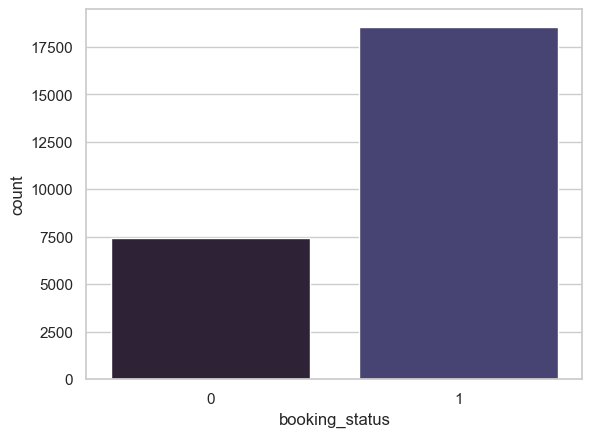

In [94]:
sns.countplot(data=df, x='booking_status')

In [96]:
from imblearn.over_sampling import RandomOverSampler

In [97]:
X = df.drop(columns='booking_status')
y = df['booking_status']

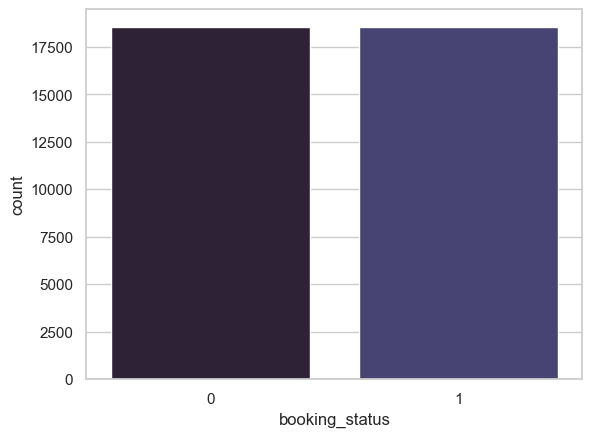

In [98]:
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

### Scale

In [99]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000
mean,1.890000,0.141231,0.882385,2.261923,0.558962,0.042115,66.452846,2017.850269,7.332923,15.750231,3.676654,0.032769,0.028538,0.213115,105.695838,0.741962,0.713769
std,0.528702,0.462502,0.887371,1.512341,1.129991,0.200856,68.606799,0.356814,3.138925,8.849394,0.675252,0.178035,0.408891,2.068243,37.876592,0.815109,0.452007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000,2018.000000,5.000000,8.000000,4.000000,0.000000,0.000000,0.000000,80.750000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,44.000000,2018.000000,8.000000,16.000000,4.000000,0.000000,0.000000,0.000000,100.000000,1.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,100.000000,2018.000000,10.000000,23.000000,4.000000,0.000000,0.000000,0.000000,127.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [101]:
from sklearn.preprocessing import  StandardScaler

In [102]:
ss = StandardScaler()

In [103]:
X_scaled = ss.fit_transform(X)

In [105]:
from sklearn.model_selection import train_test_split

#
X_train,X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 0)

### Model


#### KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [107]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [109]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [111]:
cv_results = cross_validate(knn, X_train, y_train, cv=5)
cv_results['test_score'].mean()

0.8010855362608528

/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


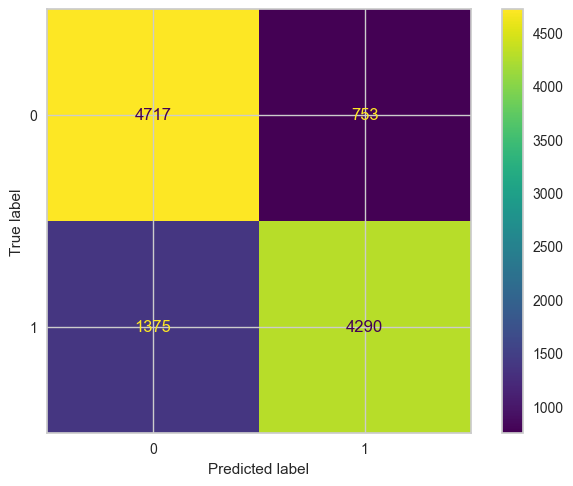

In [119]:
plot_confusion_matrix(knn, X_test, y_test)

In [121]:
y_pred = knn.predict(X_test)

In [123]:
rep =classification_report(y_test, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.77      0.86      0.82      5470
           1       0.85      0.76      0.80      5665

    accuracy                           0.81     11135
   macro avg       0.81      0.81      0.81     11135
weighted avg       0.81      0.81      0.81     11135



#### Catboost

In [125]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [126]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [127]:
y_pred = xgb.predict(X_test)

In [129]:
cf = classification_report(y_test, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      5470
           1       0.88      0.87      0.87      5665

    accuracy                           0.87     11135
   macro avg       0.87      0.87      0.87     11135
weighted avg       0.87      0.87      0.87     11135



/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


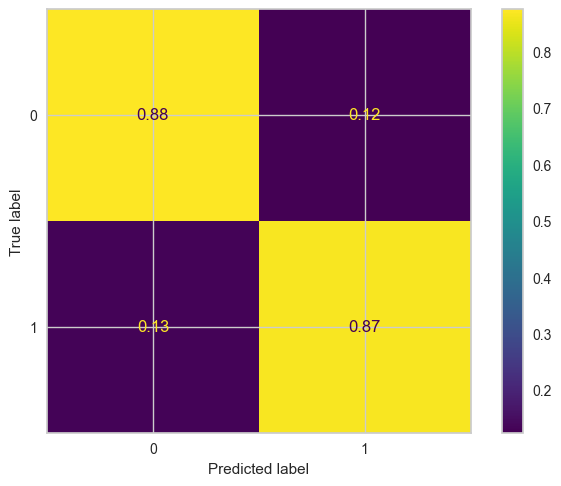

In [134]:
plot_confusion_matrix(xgb, X_test,y_test, normalize='true')

In [137]:
xgb.feature_importances_

array([0.01490639, 0.01663131, 0.02653791, 0.02629176, 0.01732716,
       0.1219543 , 0.01778405, 0.07025418, 0.05633529, 0.04257479,
       0.0148621 , 0.2525739 , 0.12324955, 0.00613366, 0.01541066,
       0.0288505 , 0.1483224 ], dtype=float32)

In [145]:
def feature_importance_plot(model, X_train, n):
    plt.figure(figsize=(8,5))
    feat_importances = pd.Series(model.feature_importances_,
                                index= X_train.columns)
    feat_importances.nlargest(n).plot(kind='barh')
    plt.show()

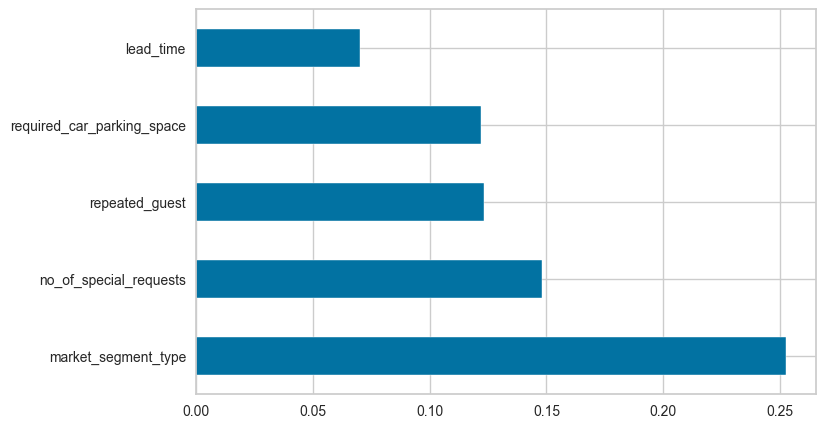

In [149]:
feature_importance_plot(xgb, X, 5)

In [152]:
columns = df.drop('booking_status', axis = 1).columns
feature_imp = pd.Series(xgb.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

market_segment_type                     0.252574
no_of_special_requests                  0.148322
repeated_guest                          0.123250
required_car_parking_space              0.121954
lead_time                               0.070254
arrival_year                            0.056335
arrival_month                           0.042575
avg_price_per_room                      0.028851
no_of_weekend_nights                    0.026538
no_of_week_nights                       0.026292
room_type_reserved                      0.017784
type_of_meal_plan                       0.017327
no_of_children                          0.016631
no_of_previous_bookings_not_canceled    0.015411
no_of_adults                            0.014906
arrival_date                            0.014862
no_of_previous_cancellations            0.006134
dtype: float32

In [158]:
def plot_learning_curves(model, X_train, y_train):
	plt.figure(figsize=(5,5))
	train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5,
		scoring='accuracy', n_jobs=1, shuffle=True)
	train_sizes=np.linspace(0.01,1.0,5)

	train_mean =  np.mean(train_scores, axis=1)
	test_mean =  np.mean(test_scores, axis=1)

	plt.plot(train_sizes, train_mean, 
			color='#111111', label='Training Score')
	plt.plot(train_sizes, test_mean, color='#111111', label='Cross Validation Score')
	
	plt.title('Learning Curves')
	plt.xlabel('Training Set Size')
	plt.ylabel('Accuracy Score')
	plt.legend(loc='best')
	plt.tight_layout()
	plt.show()


In [159]:
from sklearn.model_selection import learning_curve


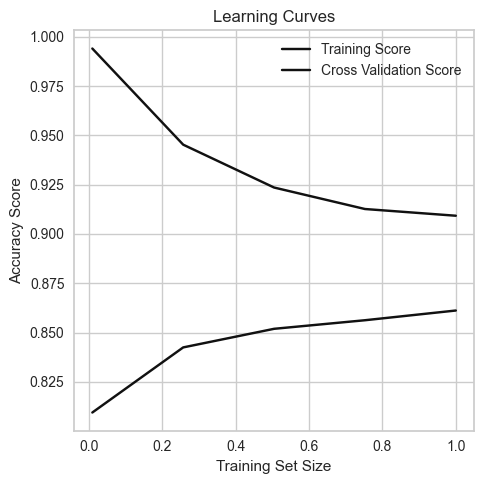

In [160]:
plot_learning_curves(xgb, X_train, y_train)

/Users/yasmeenmahomedy2/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


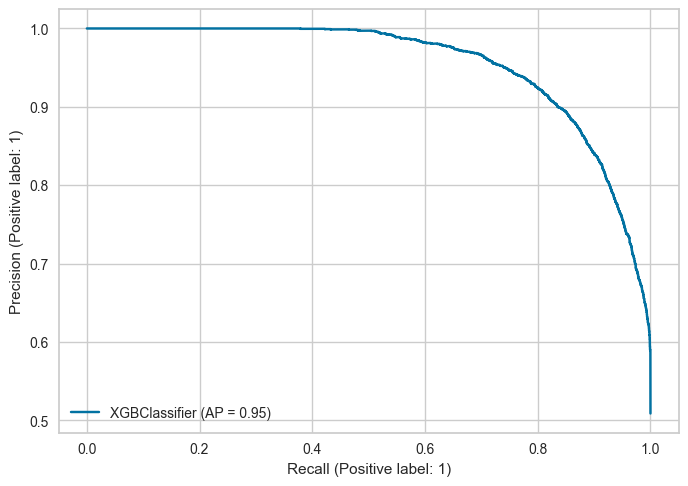

In [163]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(xgb, X_test, y_test)